*Hubert Kaczyński; nr albumu 331386; grupa 101*
# **WSI laboratorium 1. Algorytmy optymalizacji**

Poniżej znajdują się analizy przygotowanych przeze mnie algorytmów optymalizacji znajdowania minimum konkretnej funkcji dwóch zmiennych f1:

$ f1(x, y) = (2x^2 + y - 7)^2 + (x + 2y^2 - 5)^2 $

### **Zrealizowane algorytmy optymalizacji**

**Algorytm najszybszego spadku**
Podczas jego wykonywania obliczany jest gradient funkcji. Algorytm przesuwa się w przeciwnym do wskazywanego przez gradient kierunku, co sprawia, że z każdym krokiem wartość funkcji w badanym punkcie jest coraz mniejsza. Tym samym algorytm zbliża się do minimum funkcji. Nie ma jednak gwarancji na znalezienie najkrótszej drogi z punktu startowego

**Algorytm Newtona-Rapsona**
Podobny do pierwszego algorytmu, ale poza gradientem używa również macierz Hessego funkcji, co jeszcze bardziej optymalizuje znalezioną ścieżkę do minimum. Dzieje się to kosztem większej ilości obliczeń.

### **Algorytm najszybszego spadku**

Poniżej znajdują się funkcje obliczające wartośc funkcji f1, gradient i normę dla danych współrzędnych x i y:

In [2]:
import numpy as np

# f1 function formula
def f1(x, y):
    return (2 * x**2 + y - 7)**2 + (x + 2 * y**2 - 5)**2

# Calculate the gradient vector
def gradient(x, y):
    df_dx = 2 * (4 * x * (2 * x**2 + y - 7) + (x + 2 * y**2 - 5))
    df_dy = 2 * ((2 * x**2 + y - 7) + 4 * y * (x + 2 * y**2 - 5))
    return df_dx, df_dy

# Calculate the gradient norm
def norm(x, y):
    calculated_gradient = gradient(x, y)
    return np.sqrt(calculated_gradient[0]**2 + calculated_gradient[1]**2)

Poniżej znajduje się funkcja "steepest_decent_step_coordinates", która otrzymując współrzędne oraz zadaną wielkość kroku, zwraca współrzędne punktu do którego algorytm najszybszego spadku przesunie się korzystając z gradientu.

In [3]:
# Calculate new x and y coordinates after a step according to the current gradient in a descending manner
def steepest_decent_step_coordinates(x, y, step):
    calculated_gradient = gradient(x, y)
    new_x = x - calculated_gradient[0] * step
    new_y = y - calculated_gradient[1] * step
    return new_x, new_y

Ostatecznie w funkcji "optimize_steepest_descent" zawarłem pętlę działania algorytmu. Zgodnie z poleceniem, można ustawić hiperparametry, od których będzie zależeć wynik:
- start_x i start_y - startowe współrzędne,
- step - wielkość kroku reprezentowana przez ułamek,
- step-crit - bardzo mała liczba, będąca kryterium stopu,
- max-iteration - maksymalna liczba kroków, którą wykona algorytm, tak aby zabezpieczyć się przed nieskończoną pętlą w wypadku gdy step-crit będzie za małe.

In [4]:
# Main optimization function
def optimize_steepest_decent(start_x, start_y, step=0.005, step_crit=1e-6, max_iteration=10000):
    
    # Initial values
    x = start_x
    y = start_y
    iteration = 0
    points_history = [tuple((start_x, start_y))]
    
    # Main loop
    while norm(x, y) > step_crit and iteration < max_iteration:
        x, y = steepest_decent_step_coordinates(x, y, step)
        
        points_history.append(tuple((x, y)))
        iteration += 1
    return x, y, f1(x, y), iteration, points_history

#### **Wizualizacja działania algorytmu najszybszego spadku:**

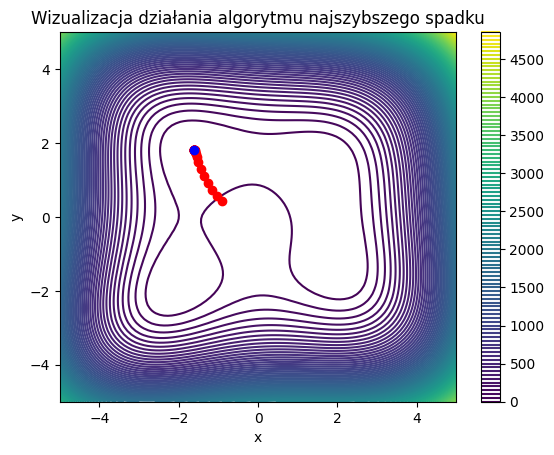

In [15]:
import matplotlib.pyplot as plt
from random import random

points_history = np.array(optimize_steepest_decent(np.random.uniform(-5, 5), np.random.uniform(-5, 5))[4])
def plot_visualization(points_history, title):
    values_x = np.linspace(-5, 5, 100)
    values_y = np.linspace(-5, 5, 100)
    data = np.meshgrid(values_x, values_y)
    X, Y = data
    Z = f1(X, Y)
    plt.contour(X, Y, Z, levels=100)
    plt.plot(points_history[:, 0], points_history[:, 1], 'ro-')
    plt.plot(points_history[-1, 0], points_history[-1, 1], 'bo')
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

plot_visualization(points_history, "Wizualizacja działania algorytmu najszybszego spadku")

### **Algorytm Newtona-Rapsona**

Poza użytymi już wcześniej funkcjami f1, gradient i norm, dodanana zostaje funkcja inverse_hessian, która zwraca odwórconą macierz Hessego dla danego punktu. W wypadku, w którym nie da się odwrócić macierzy, to zwraca macierz jednostkową.

In [6]:
# Return an inversed Hessian if possible; if impossible return a unit matrix
def inverse_hessian(x, y):
    df_dxx = 48*x**2 + 8*y - 54
    df_dyy = 8*x + 48*y**2 - 38
    df_dxy = 8*x + 8*y
    det = df_dxx * df_dyy - df_dxy * df_dxy
    hessian = [df_dxx, df_dxy], [df_dxy, df_dyy]
    if det != 0:
        return np.linalg.inv(hessian)
    else:
        return np.eye(2)

Aby efektywniej zoptymalizować szukanie ścieżki do minimum, algorytm Newtona-Rapsona wprowadza współczynnik alfa, który odpowiada za minimalizację kierunkową. Sprawia to, że przesunięcia po wykresie są bardziej dopasowane do rzeczywistego minimum. Współczynnik alfa jest obliczany przez funkcję direcrtion_minimization:

In [7]:
from scipy.optimize import minimize_scalar

# Calculate the alfa factor to optimize the step; direction argument is a product of the inversed hessian and gradient matrixes
def direction_minimization(x, y, direction):
    def f_alpha(alpha):
        new_x = x + alpha * direction[0]
        new_y = y + alpha * direction[1]
        return f1(new_x, new_y)
    
    # One dimension optimization in relation to alfa
    res = minimize_scalar(f_alpha)
    return res.x

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Podobnie jak w algorytmie najszybszego spadku, algorytm Newtona-Rapsona używa funkcji, która oblicza współrzędne kolejnego punktu, na który powinien przesnuąć się algorytm w poszukiwaniu minimum, biorąc pod uwagę zadany krok. Korzysta ona z odwróconego hesjanu i współczynniku alfa:

In [8]:
# Calculate new x and y coordinates after a step according to the current gradient in a descending manner
def newton_step_coordinates(x, y, step):
    direction = -np.dot(inverse_hessian(x, y), gradient(x, y))
    alpha = direction_minimization(x, y, direction)
    new_x = x + alpha * direction[0] * step
    new_y = y + alpha * direction[1] * step
    return new_x, new_y

Prawie identycznie wygląda pętla działania algorytmu Newtona-Rapsona zawarta w poniższym "optimize_newton", jak dla algorytmu najszybszego spadku. Jest ona zależna od tych samych hiperparametrów:

In [9]:
# Main optimization function
def optimize_newton(start_x, start_y, step=1, step_crit=1e-6, max_iteration=10000):

    x = start_x
    y = start_y
    iteration = 0
    points_history = [tuple((start_x, start_y))]

    # Main loop
    while norm(x, y) > step_crit and iteration < max_iteration:
        x, y = newton_step_coordinates(x, y, step)
        iteration += 1
        points_history.append(tuple((x, y)))  
    return x, y, f1(x, y), iteration, points_history

#### **Wizualizacja działania algorytmu Newtona-Rapsona:**

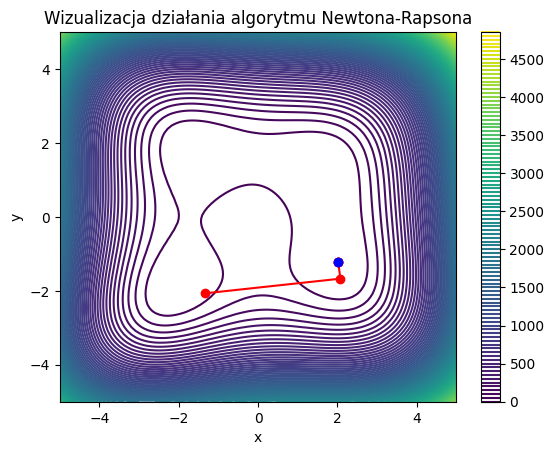

In [23]:
points_history = np.array(optimize_newton(np.random.uniform(-5, 5), np.random.uniform(-5, 5))[4])
plot_visualization(points_history, "Wizualizacja działania algorytmu Newtona-Rapsona")

### **Porównanie algorytmów optymalizacji**

**UWAGA do działania algorytmów:** Metoda najszybszego spadku, przy zbyt dużych wartościach zadanego kroku potrafi w trakcie szukania minimum, znaleźć się w punkcie którego wartość funkcji jest za duża dla programu. Dlatego dla zadanej w poleceniu funkcji f1, krok nie powinien przekroczyć wartości 0.005.

#### **Wyniki działania**
Poniżej znajdują się najlepiej policzone minimum w 100 próbach dla obu funkcji. Parametry skoku i startowego punktu zostały dobrane losowo:

In [11]:
optimal_descent = float('inf')
optimal_newton = float('inf')
optimal_descent_x = 0
optimal_descent_y = 0
optimal_newton_x = 0
optimal_newton_y = 0

for i in range(100):
    x_descent = np.random.uniform(-5, 5)
    y_descent = np.random.uniform(-5, 5)
    x_newton = np.random.uniform(-5, 5)
    y_newton = np.random.uniform(-5, 5)

    step_descent = random() * 0.005
    step_newton = random()

    descent_results = optimize_steepest_decent(x_descent, y_descent, step_descent)
    newton_results = optimize_newton(x_newton, y_newton, step_newton)
    
    if descent_results[2] < optimal_descent:
        optimal_descent = descent_results[2]
        optimal_descent_x = descent_results[0]
        optimal_descent_y = descent_results[1]

    if newton_results[2] < optimal_newton:
        optimal_newton = newton_results[2]
        optimal_newton_x = newton_results[0]
        optimal_newton_y = newton_results[1]

print("Dla algorytmu najszybszego spadku:")
print(f"Optymalna wartoś: {optimal_descent}\nOptymalny punkt: {optimal_descent_x}, {optimal_descent_y}\n")
print("Dla algorytmu Newtona-Rapsona:")
print(f"Optymalna wartoś: {optimal_newton}\nOptymalny punkt: {optimal_newton_x}, {optimal_newton_y}")

Dla algorytmu najszybszego spadku:
Optymalna wartoś: 2.1472434822927516e-15
Optymalny punkt: -2.107744253248284, -1.885171648963301

Dla algorytmu Newtona-Rapsona:
Optymalna wartoś: 8.242233094922907e-22
Optymalny punkt: 2.027212072859898, -1.219177576720759


#### **Wniosek:**
Algorytm Newtona-Rapsona dzięki użyciu macierzy Hessego oraz współczynnika alfa, który zapewnia minimalizację kierunkową, jest dokładniejszy w znajdowaniu minimum od algorytmu najszybszego spadku.

#### **Zależność czasu działania i ilości wykonanych iteracji od wartości zadanego kroku**

Poniżej zamieściłem kod który generuje wykresy porównujące czas działania i ilośc wykonanych iteracji w zależności od zadanego kroku dla obu algorytmów. Dla każdego algorytmu zostanie wykonane po 10 obliczeń dla 100 wartości kroku równomiernie rozłożonych w przedziałach:
- 0,0005 - 0,005 dla najszybszego spadku
- 0,1 - 1 dla Newtona-Rapsona
Z każdych 10 zestawów obliczeń wyciągnięta zostanie suma wyników.

Oś wartości skoku została przeskalowana, żeby pogodzić różne przedziały, a startowe punkty dla każdego obliczenia są dobrane losowo.

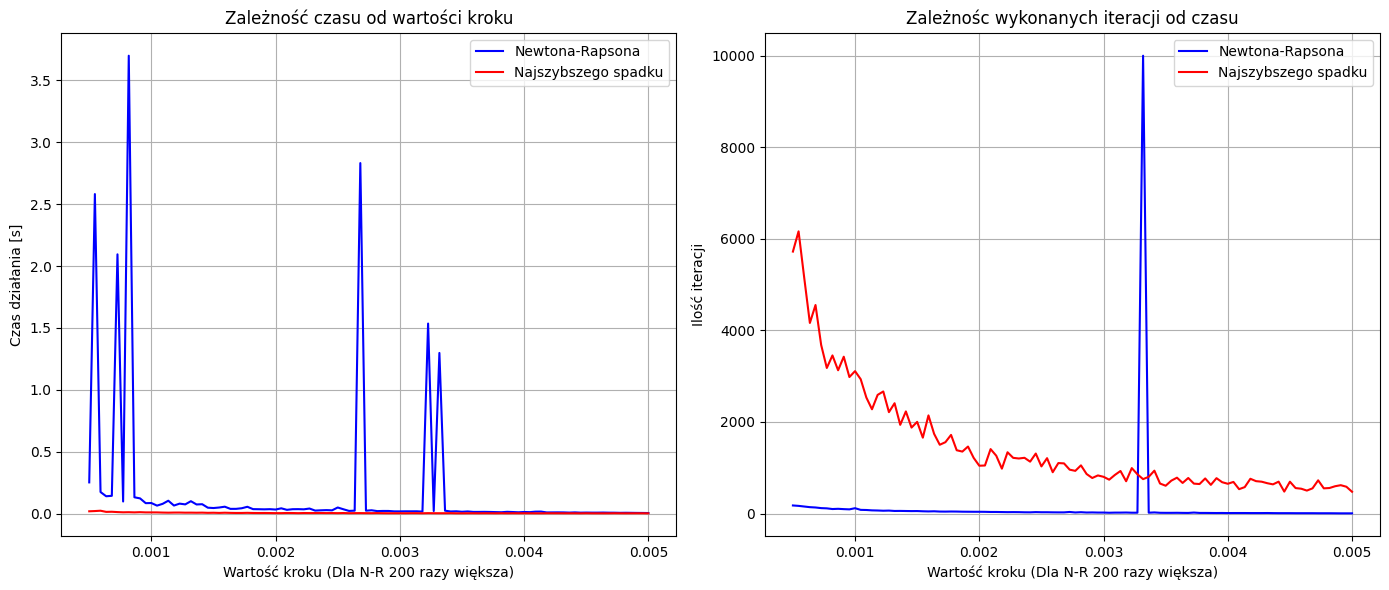

In [25]:
import time

step_values_descent = np.linspace(0.0005, 0.005, 100)
step_values_newton = [step * 200 for step in step_values_descent]

newton_times = []
newton_iterations = []
steepest_times = []
steepest_iterations = []

# Generate results for Newton-Rapson
for step in step_values_newton:
    iterations_newton_result = 0
    start_time = time.time()
    for i in range(10):
        _, _, _, iterations_newton, _ = optimize_newton(np.random.uniform(-5, 5), np.random.uniform(-5, 5), step)
        iterations_newton_result += iterations_newton
    newton_times.append(time.time() - start_time)
    newton_iterations.append(iterations_newton)

# Generate results for Steepest-Descent
for step in step_values_descent:
    iterations_steepest_result = 0
    start_time = time.time()
    for i in range(10):
        _, _, _, iterations_steepest, _ = optimize_steepest_decent(np.random.uniform(-5, 5), np.random.uniform(-5, 5), step)
        iterations_steepest_result += iterations_steepest
    steepest_times.append(time.time() - start_time)
    steepest_iterations.append(iterations_steepest_result)

# Create a plot consisting of 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Execution time vs. Step size
ax1.plot(np.array(step_values_newton) / 200, newton_times, label="Newtona-Rapsona", color='b')
ax1.plot(step_values_descent, steepest_times, label="Najszybszego spadku", color='r')
ax1.set_xlabel('Wartość kroku (Dla N-R 200 razy większa)')
ax1.set_ylabel('Czas działania [s]')
ax1.set_title('Zależność czasu od wartości kroku')
ax1.legend()
ax1.grid(True)

# Plot 2: Number of Iterations vs. Step size
ax2.plot(np.array(step_values_newton) / 200, newton_iterations, label="Newtona-Rapsona", color='b')
ax2.plot(step_values_descent, steepest_iterations, label="Najszybszego spadku", color='r')
ax2.set_xlabel('Wartość kroku (Dla N-R 200 razy większa)')
ax2.set_ylabel('Ilość iteracji')
ax2.set_title('Zależnośc wykonanych iteracji od czasu')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

#### **Wniosek:**
Algorytm Newtona-Rapsona jest efektywniejszy w znajdowaniu minimum funkcji f1, co pokazuje wykres obrazujący ilość iteracji (wykonuje ich mniej niż najszybszy spadek). Osiąga to dzięki dodatkowym obliczeniom które optymalizują ścieżkę do minimum. Dzieje się to jednak kosztem czasu. Jak widać na wykresie czasu algorytm najszybszego spadku jest szybszy niż algorytm Newtona-Rapsona. Dla obu algorytmów prawdą jest, że im większy krok tym szybciej i efektywniej on działa. Pojedyncze skoki w wartościach widoczne na wykresach, wynikają w mojej opinii z niefortunnego doboru punktu startowego lub losowych opóźnienień sprzętowych.

#### **Zależność czasu działania i ilości wykonanych iteracji od wartości zadanego kryterium stopu**

Poniżej zamieściłem kod który generuje wykresy porównujące czas działania i ilośc wykonanych iteracji w zależności od zadanego kryterium stopu dla obu algorytmów. Dla każdego algorytmu zostanie wykonanych 100 obliczeń dla wartości kryterium stopu równomiernie rozłożonych w przedziale 1e-10 - 1e-3. Dla każdego ze 100 kryteriów stopu wyciągana jest suma z 10 prób dla losowych startowych współrzędnych.

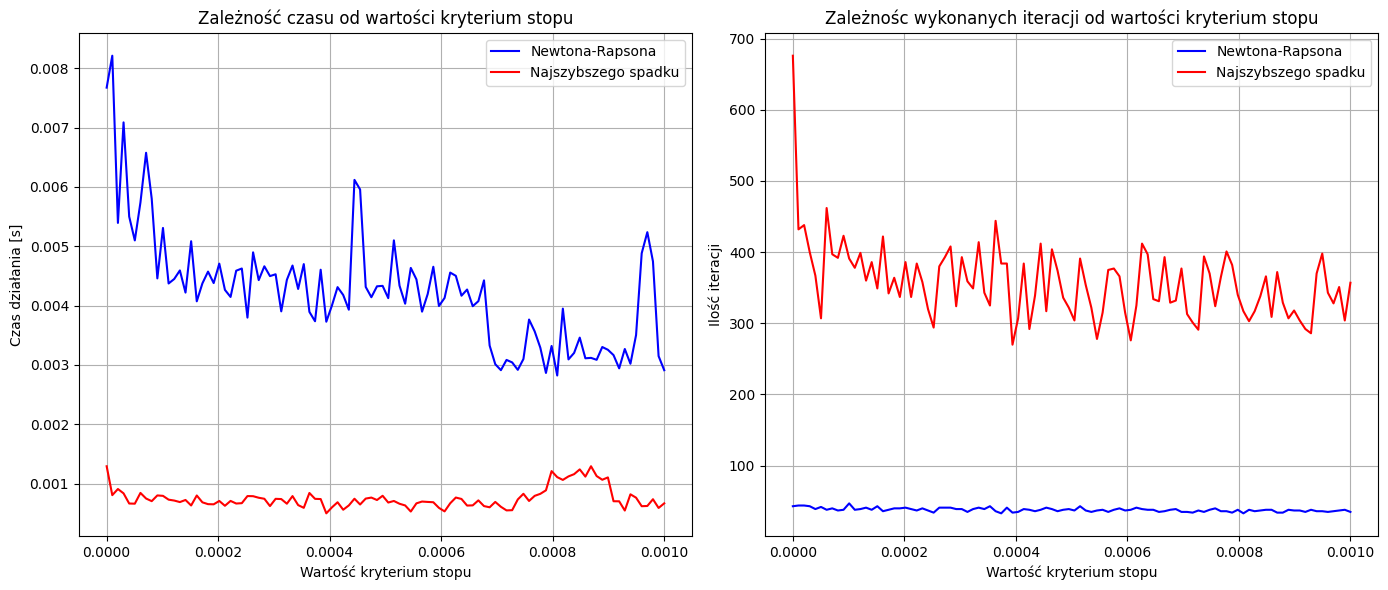

In [27]:
stop_crit_values = np.linspace(0.0000000001, 0.001, 100)

newton_times = []
newton_iterations = []
steepest_times = []
steepest_iterations = []

# Generate results for Newton-Rapson
for crit in stop_crit_values:
    iterations_newton_result = 0
    start_time = time.time()
    for i in range(10):
        _, _, _, iterations_newton, _ = optimize_newton(np.random.uniform(-5, 5), np.random.uniform(-5, 5), step_crit=crit)
        iterations_newton_result += iterations_newton
    newton_times.append(time.time() - start_time)
    newton_iterations.append(iterations_newton_result)

# Generate results for Steepest-Descent
for crit in stop_crit_values:
    iterations_steepest_result = 0
    start_time = time.time()
    for i in range(10):
        _, _, _, iterations_steepest, _ = optimize_steepest_decent(np.random.uniform(-5, 5), np.random.uniform(-5, 5), step_crit=crit)
        iterations_steepest_result += iterations_steepest
    steepest_times.append(time.time() - start_time)
    steepest_iterations.append(iterations_steepest_result)

# Create a plot consisting of 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Execution time vs. Stop Criterium
ax1.plot(stop_crit_values, newton_times, label="Newtona-Rapsona", color='b')
ax1.plot(stop_crit_values, steepest_times, label="Najszybszego spadku", color='r')
ax1.set_xlabel('Wartość kryterium stopu')
ax1.set_ylabel('Czas działania [s]')
ax1.set_title('Zależność czasu od wartości kryterium stopu')
ax1.legend()
ax1.grid(True)

# Plot 2: Number of Iterations vs. Step size
ax2.plot(stop_crit_values, newton_iterations, label="Newtona-Rapsona", color='b')
ax2.plot(stop_crit_values, steepest_iterations, label="Najszybszego spadku", color='r')
ax2.set_xlabel('Wartość kryterium stopu')
ax2.set_ylabel('Ilość iteracji')
ax2.set_title('Zależnośc wykonanych iteracji od wartości kryterium stopu')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

#### **Wniosek:**
W kwestii tego który algorytm jest szybszy bądź efektywniejszy, wnioski są identyczne jak przy zależności od wielkości kroku. Newtona-Rapsona jest efektywniejszy, ale najszybszego spadku jest szybszy. Wyniki są bardzo zbliżone dla tego samego kroku na wykresach zależności czasu i ilości iteracji od wielkości kroku. To co dopiero znacząco zmieniło wynik w porównaniu z tamtymi wykresami, to bardzo małe kryterium stopu. Takie kryterium sprawiło, że algorytmom trudniej jest znaleźć minimum. Dlatego też można zauważyć, że dla obu algorytmów, im większe jest kryterium stopu, tym szybciej działa algorytm i tym mniej wykonuje iteracji, a w kwestii ilości iteracji ma to większy wpływ na algorytm najszybszego spadku.

#### **Zależność czasu działania i ilości wykonanych iteracji od miejsca startowego**

Poniżej zamieściłem kod który generuje wykresy 3D porównujące czas działania i ilośc wykonanych iteracji w zależności od zadanych punktów startowych dla obu algorytmów. Dla każdego dobranego punktu wykonanych zostaje 10 obliczeń, a ich wyniki są sumowane.

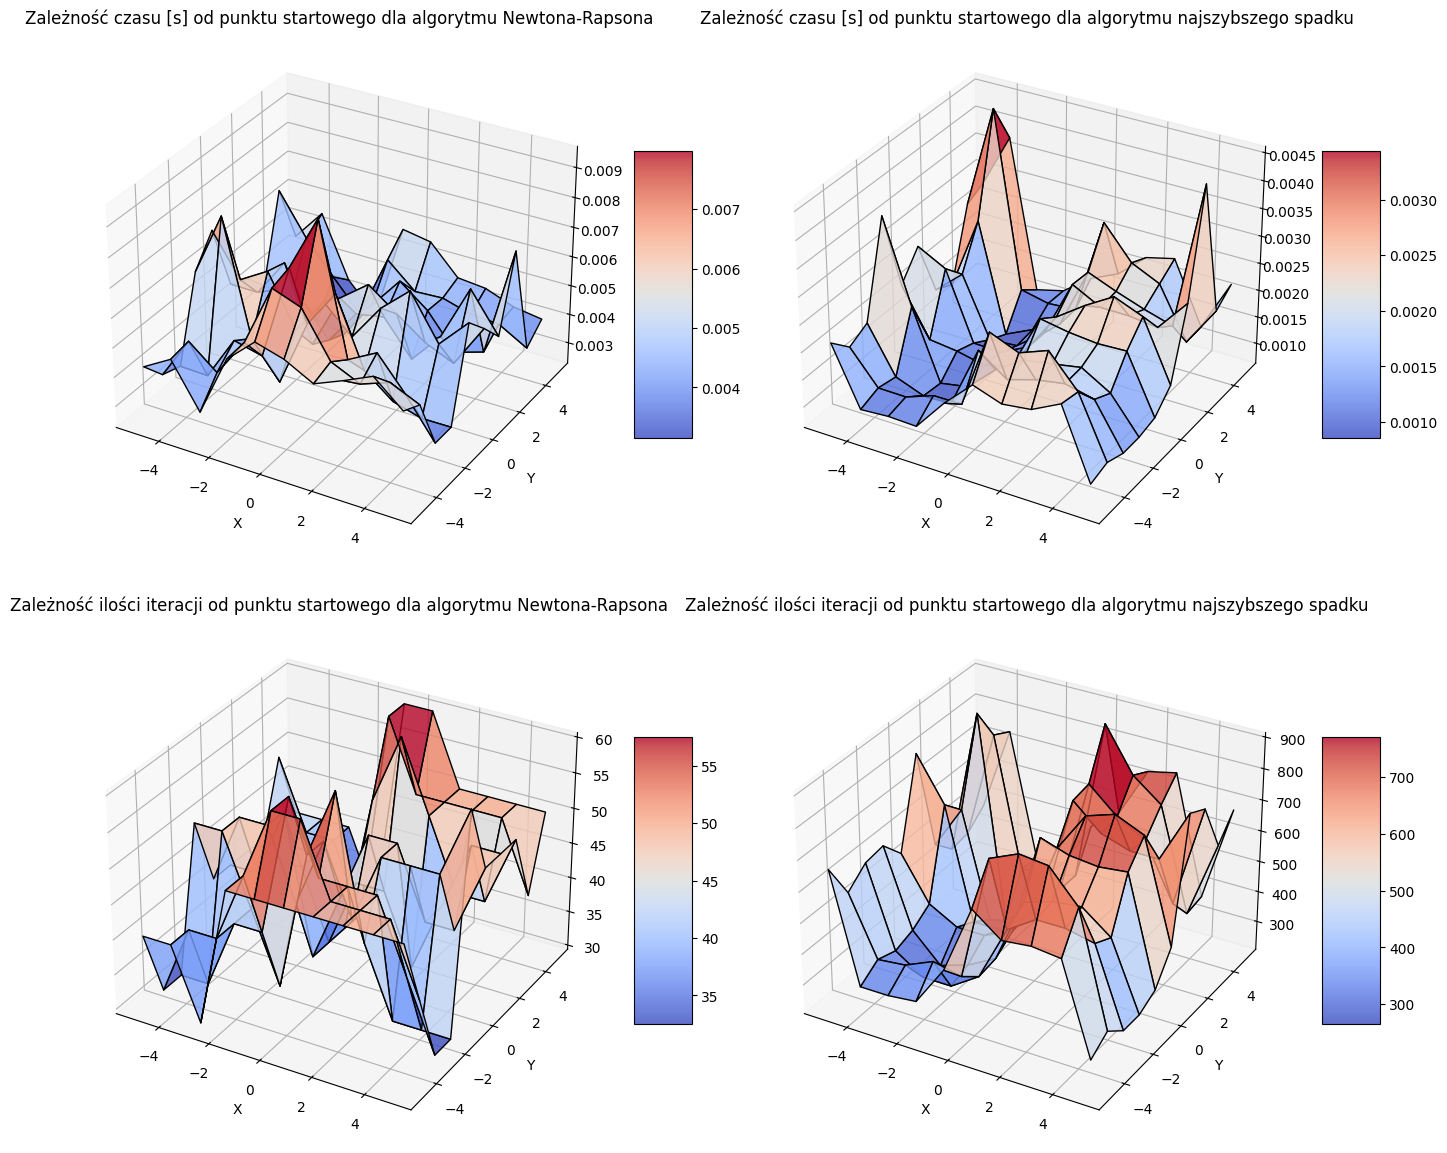

In [29]:
# Define the grid for x and y values
x_values = np.linspace(-5, 5, 10)
y_values = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(x_values, y_values)

# Initialize arrays to store total time and iteration counts for each (x, y)
total_times_newton = np.zeros_like(X)
total_iterations_newton = np.zeros_like(X)
total_times_steepest = np.zeros_like(X)
total_iterations_steepest = np.zeros_like(X)

# Run both optimization methods for each point on the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_start, y_start = X[i, j], Y[i, j]
        
        # Run Newton-Raphson method 10 times and accumulate time and iteration count
        time_sum_newton = 0
        iterations_sum_newton = 0
        start_time = time.time()
        for _ in range(10):
            _, _, _, iterations, _ = optimize_newton(x_start, y_start)
            iterations_sum_newton += iterations
        time_sum_newton = time.time() - start_time
        
        # Store results for Newton-Raphson
        total_times_newton[i, j] = time_sum_newton
        total_iterations_newton[i, j] = iterations_sum_newton

        # Run Steepest Descent method 10 times and accumulate time and iteration count
        time_sum_steepest = 0
        iterations_sum_steepest = 0
        start_time = time.time()
        for _ in range(10):
            _, _, _, iterations, _ = optimize_steepest_decent(x_start, y_start)
            iterations_sum_steepest += iterations
        time_sum_steepest = time.time() - start_time
        
        # Store results for Steepest Descent
        total_times_steepest[i, j] = time_sum_steepest
        total_iterations_steepest[i, j] = iterations_sum_steepest

fig = plt.figure(figsize=(14, 12))

# Plot 1: time for Newton-Raphson
ax1 = fig.add_subplot(221, projection='3d')
surf1 = ax1.plot_surface(X, Y, total_times_newton, cmap='coolwarm', edgecolor='k', alpha=0.8)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax1.set_title("Zależność czasu [s] od punktu startowego dla algorytmu Newtona-Rapsona")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Plot 2: time for Steepest Descent
ax2 = fig.add_subplot(222, projection='3d')
surf2 = ax2.plot_surface(X, Y, total_times_steepest, cmap='coolwarm', edgecolor='k', alpha=0.8)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title("Zależność czasu [s] od punktu startowego dla algorytmu najszybszego spadku")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Plot 3: iterations for Newton-Raphson
ax3 = fig.add_subplot(223, projection='3d')
surf3 = ax3.plot_surface(X, Y, total_iterations_newton, cmap='coolwarm', edgecolor='k', alpha=0.8)
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)
ax3.set_title("Zależność ilości iteracji od punktu startowego dla algorytmu Newtona-Rapsona")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

# Plot 4: iterations for Steepest Descent
ax4 = fig.add_subplot(224, projection='3d')
surf4 = ax4.plot_surface(X, Y, total_iterations_steepest, cmap='coolwarm', edgecolor='k', alpha=0.8)
fig.colorbar(surf4, ax=ax4, shrink=0.5, aspect=5)
ax4.set_title("Zależność ilości iteracji od punktu startowego dla algorytmu najszybszego spadku")
ax4.set_xlabel('X')
ax4.set_ylabel('Y')

plt.tight_layout()
plt.show()

#### **Wniosek:**
Różne punkty wymagają od danego algorytmu różnej ilości czasu i iteracji. Punkty, które sprawiają trud dla jednego algorytmu, są proste dla drugiego np. okolice (-5, -5) i (-4, 5). Można zauważyć, że największe i njamniejsze wartości występują dla poodbnych punktów na obu wykresach jednego algorytmu.

## **Wnioski końcowe**

W mojej opinii z powyższych analiz wynika, że algorytm najszybszego spadku wykazuje się szybszym działaniem, ponieważ wykonuje znacznie mniej obliczeń, niż algorytm Newtona-Rapsona. Robi to jednak kosztem efektywności i dokładności wyniku. Minimalizacja kierunkowa w postaci współczynnika alfa i użycie macierzy Hessego w algorytmie Newtona-Rapsona procentuje w kwestii ilości wykonanych iteracji i dokładności wyniku. Oba algortymy działają jednak poprawnie dla punktów zadanych w dziedzinie. To co wymaga podkreślenia to dośc spore różnice w wartościach kroku, dla obu algorytmów. Algorytm Newtona-Rapsona działa dobrze dla funkcji f1 dla wszystkich wartości $(0, 1]$, natomiast algorytm najszybszego spadku po przekroczeniu wartości ok. 0,005 trafia na współrzędne, gdzie funkcja f1 ma za duże wartości dla programu. Dla innej funkcji taki problem by nie istniał lub mógłby zupełnie inaczej zmienić przedziały dla obu algorytmów.